In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 시각화 도구 (matplotlib, seaborn, plotly)
# 데이터 분석 도구 (pandas, numpy)
plt.style.use('seaborn')
sns.set(font_scale = 2.5)
# 일일이 세팅하기 싫어서 미리 세팅
import missingno as msno
# 결측치 파악 시각화 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# jupyter notebook 실행한 브라우저에서 그림을 볼 수 있도록 브라우저 내부(inline)

/tmp/ipykernel_18/638613340.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


1. 데이터셋 확인 - 대부분의 캐글 데이터들은 잘 정제되어 있다. 가끔 null data가 존재하는데 이를 확인하고, 수정
2. 탐색적 데이터 분석(exploratory data anaylysis) - 여러 feature들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인. 여러 시각화 툴을 사용하여 insight를 얻는다.
3. feature engineering - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록, feature들을 engineering한다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 한다.
4. model 만들기 - sklearn을 사용해 모델 생성. 파이썬에서 머신러닝을 할때 sklearn을 사용하면 수많은 알고리즘을 일관된 문법으로 사용 가능. 물론 딥러닝을 위해 tensorflow, pythorch 등을 사용할 수 도 있다.
5. 모델 학습 및 예측 - trainset을 가지고 모델을 학습시킨 후, testset을 가지고 prediction 한다.
6. 모델 평가 - 예측 성능이 원하는 수준인지 판단. 풀려는 문제에 따라 모델을 평가하는 방식도 달라진다. 학습된 모데이 어떤 것을 학습하였는지 확인하자

# 1. Dataset 확인
* 파이썬에서 테이블화 된 데이터를 다루는 데 가장 최적화되어 있으며, 많이 쓰이는 라이브러리는 pandas이다.
* 우리는 pandas를 사용하여 데이터셋의 간단한 통계적 분석부터, 복잡한 처리들을 간단한 메소드를 사용하여 해낼 수 있다.
* 파이썬으로 데이터분석을 한다고 하면 반드시 능숙해져야 할 라이브러리이니, 여러 커널들을 공부하면서 사용법에 익숙해지도록 반복 또 반복하자
* 캐글에서 데이터셋은 보통 train, testset으로 나누어져 있다.

In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe()
# 각 feature가 가진 통계치들을 반환

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# 1.1 Null data check

In [6]:
for col in df_train.columns:
    msg = 'column: {:>11}\t Percet of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train.shape[0])) 
    print(msg)

column: PassengerId	 Percet of NaN value: 0.00%
column:    Survived	 Percet of NaN value: 0.00%
column:      Pclass	 Percet of NaN value: 0.00%
column:        Name	 Percet of NaN value: 0.00%
column:         Sex	 Percet of NaN value: 0.00%
column:         Age	 Percet of NaN value: 19.87%
column:       SibSp	 Percet of NaN value: 0.00%
column:       Parch	 Percet of NaN value: 0.00%
column:      Ticket	 Percet of NaN value: 0.00%
column:        Fare	 Percet of NaN value: 0.00%
column:       Cabin	 Percet of NaN value: 77.10%
column:    Embarked	 Percet of NaN value: 0.22%


In [7]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:>5.2f}%'.format(col, 100*(df_test[col].isnull().sum()/df_test.shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value:  0.00%
column:     Pclass	 Percent of NaN value:  0.00%
column:       Name	 Percent of NaN value:  0.00%
column:        Sex	 Percent of NaN value:  0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value:  0.00%
column:      Parch	 Percent of NaN value:  0.00%
column:     Ticket	 Percent of NaN value:  0.00%
column:       Fare	 Percent of NaN value:  0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value:  0.00%


<Axes: >

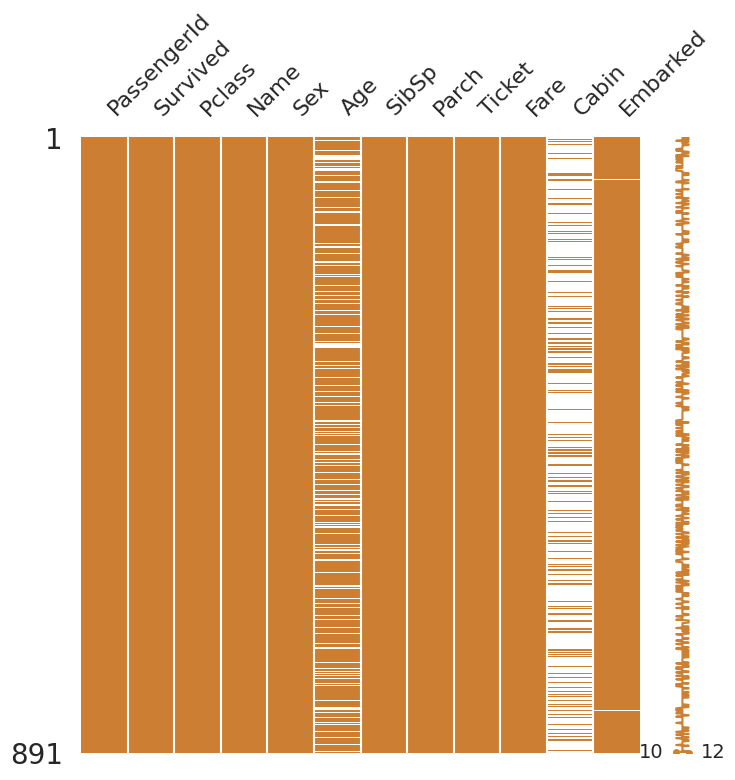

In [8]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color= (0.8, 0.5, 0.2)) 
# iloc = indexlocation, figsize = 크기, color = RGB
# msno : missingno (결측치 파악하는)

<Axes: >

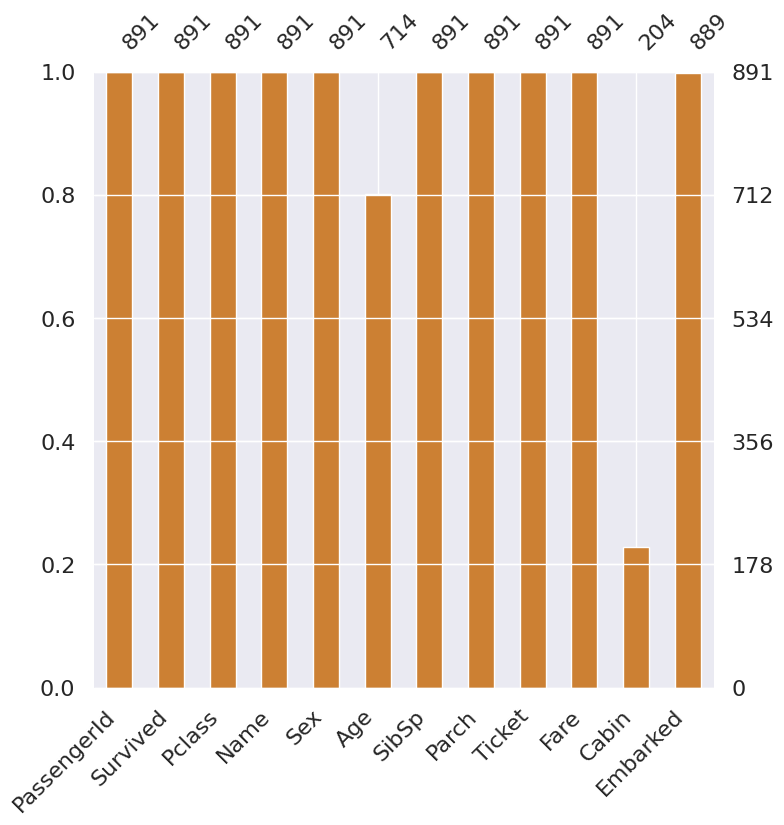

In [9]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color= (0.8, 0.5, 0.2))

<Axes: >

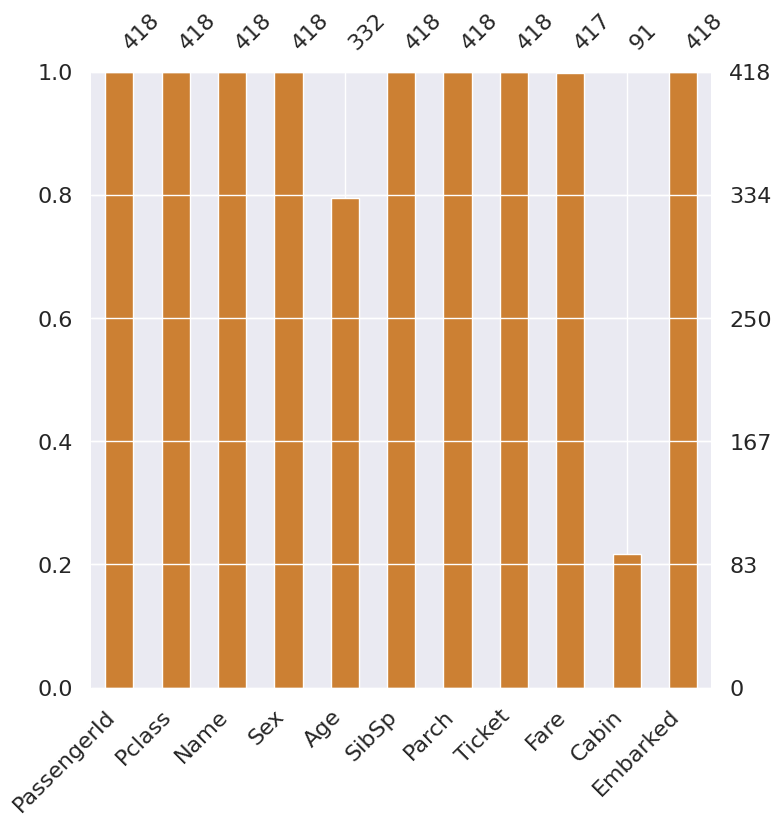

In [10]:
msno.bar(df=df_test.iloc[:,:], figsize=(8,8), color= (0.8, 0.5, 0.2))

# 1.2 Target label 확인
* target lablel 이 어떤 distribution을 가지고 있는지 확인해야 한다.
* 지금 같은 binary calssfication 문제의 경우에서 , 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있다.

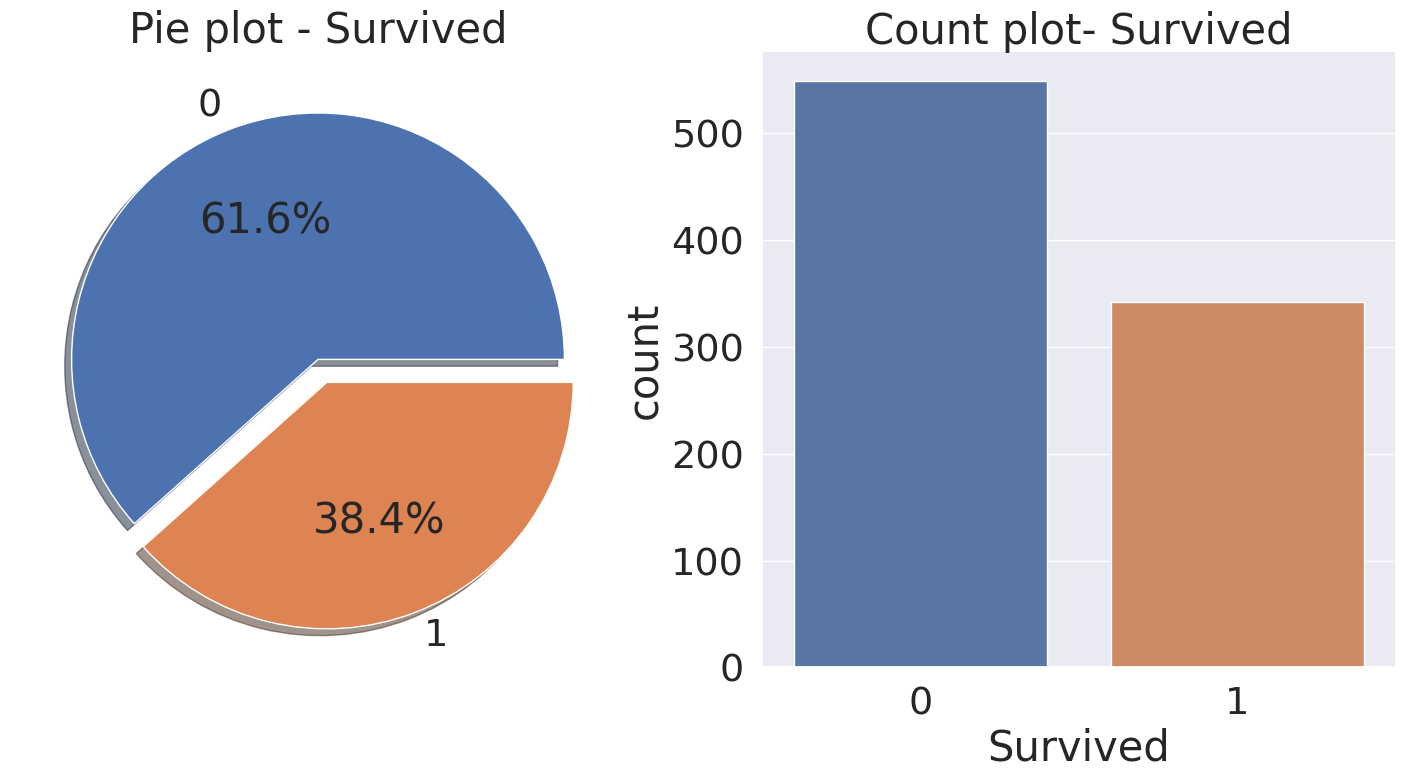

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
# subplots(행, 열, figsize(가로, 세로))
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
# df_train['Survived'].value_counts() : 0,1 수 / plot.pie(explode: 각각 가운데에서 멀어진 정도) pie형태로
# autopct='%1.1f(소수점 자릿수)/ %%: % / ax=ax[0] : left / value_counts() : pandas 함수
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot- Survived')

plt.show()

# 2. Exploratory data analysis
* 이제 본격적으로 데이터 분석 시작. 데이터는 매우 많으므로 이 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요
* 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있다. 특정 목적에 맞는 소스코드를 정리해두어 필요할 때마다 참고하면 편하다
# 2.1 Pclass
* 먼저 Pclass에 대해서 알아보자. Pclass는 ordinal, 서수형 데이터이다. 카테고리이면서, 순서가 있는 데이터 타입이다.
* 먼저 Pclass에 따른 생존률의 차이를 살펴보자. 엑셀의 피벗차트와 유사한 작업을 하게 되는데, pandas dataframe 에서는 groupby를 사용하면 쉽게 할 수 있다. 또한 pivot이라는 메소드도 있다.
* 'Pclass', 'Survived'를 가져온 후, pclass로 묶는다. 그러고 나면 각 pclass마다 0,1이 count가 되는데, 이를 평균내면 각 pclass 별 생존율이 나온다.
* 아래와 같이 count()를 하면, 각 class에 몇명이 있는지 확인할 수 있다. sum()를 하면 216명 중 생존한(survived=1) 사람의 총합을 주게 된다.

In [12]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index= True).count()
# count를 통해 0,1 모두 계산하므로 총합이 전체 인원 출력 / as_index=True : Pclass를 인덱스로 두겠다

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index= True).sum()
# sum을 통해 survived시 True=1, False= 0 이므로 생존한 인구만 합치기 

,Survived
Pclass,
1,136
2,87
3,119


In [14]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True).style.background_gradient(cmap='summer_r')
# margins = All(total) 총합보기 / 색상 비교 color map scheme

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

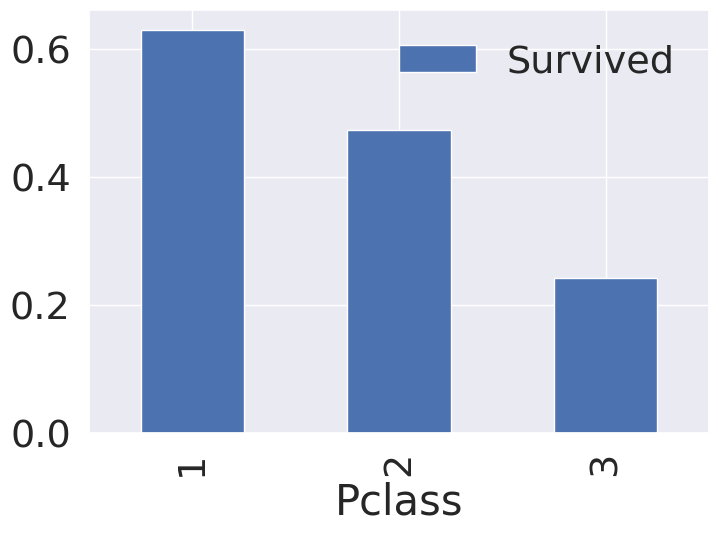

In [15]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()
# ascending : 상승으로 index인 Pclass 기준

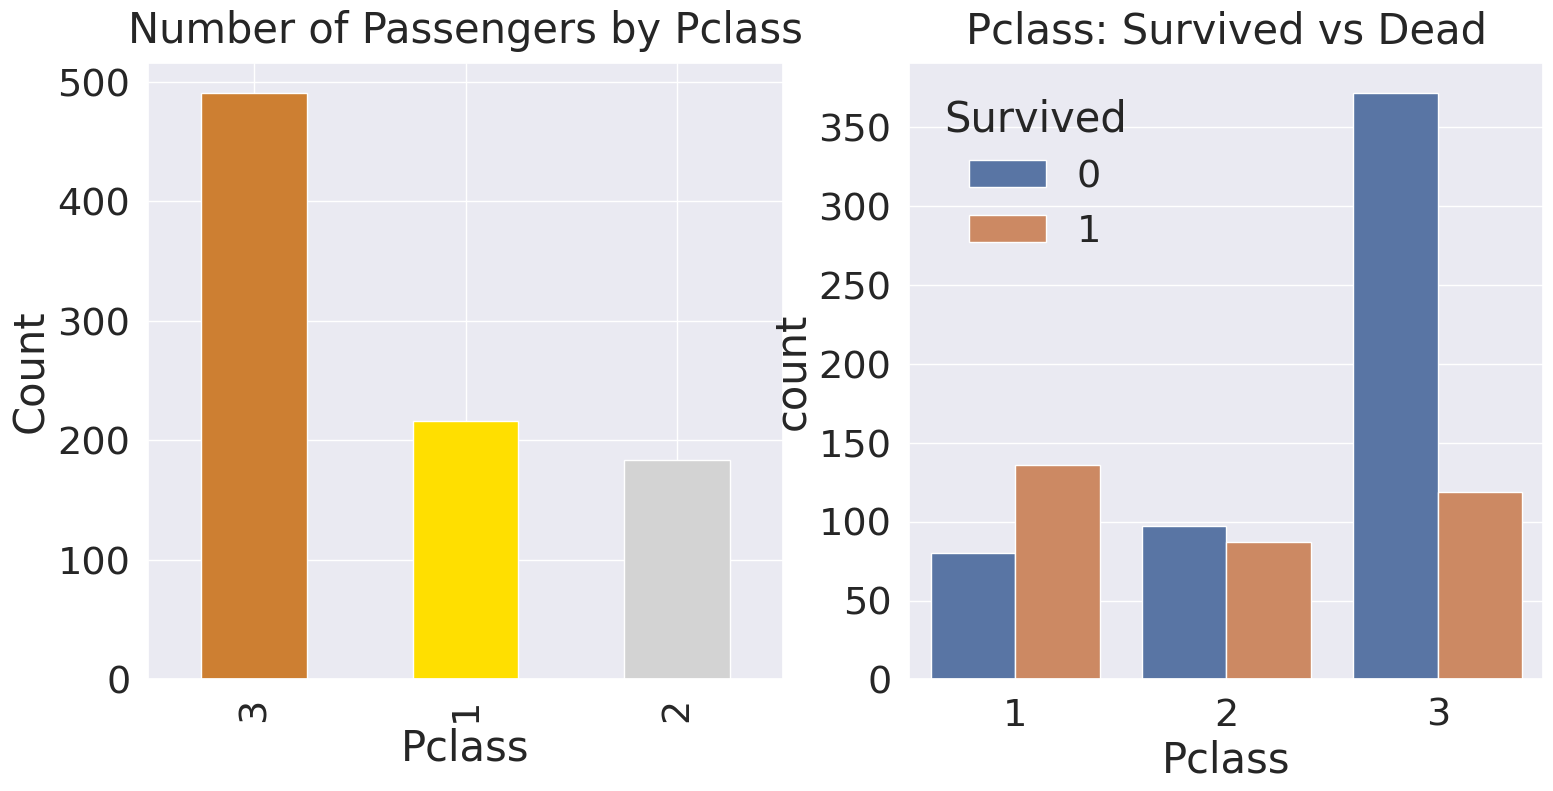

In [16]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))
# f, ax : 아래 그래프의 행, 열
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', data=df_train , ax=ax[1], hue= 'Survived')
# sns : imort seaborn as sns / hue: 하나의 구분 색을 나눠서 보여줌 / x,data, ax, hue 서순 필요없음
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

# 2.2 Sex
* 이번에는 성별로 생존율이 어떻게 달라지는지 확인하자
* 마찬가지로 pandas groupby와 seaborn countplot를 사용해서 시각화하자

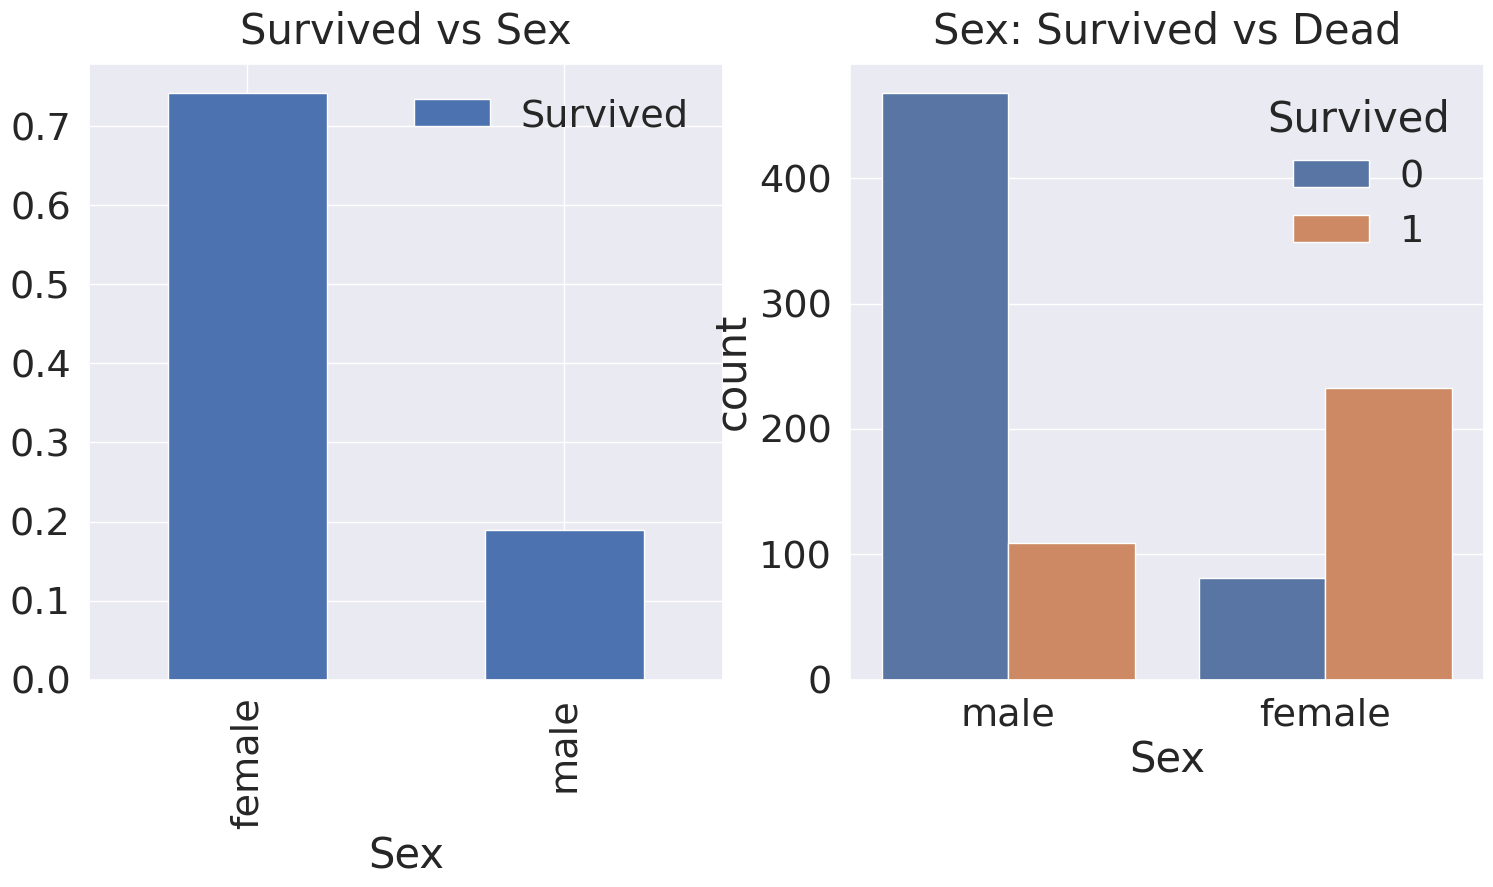

In [17]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex' ,y=y_position)
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead', y= y_position)
plt.show()

In [18]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [19]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


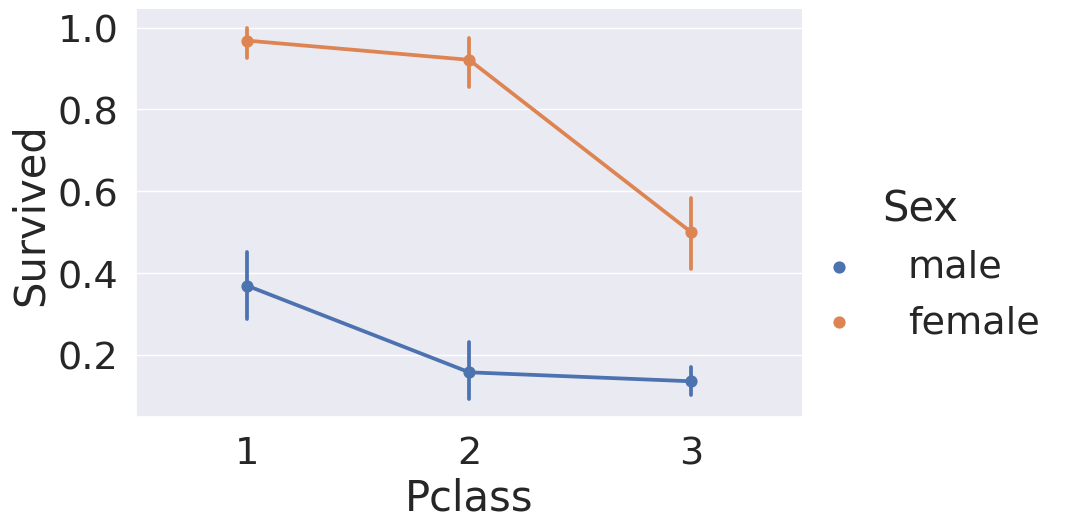

In [20]:
sns.catplot(x='Pclass', y = 'Survived', hue='Sex', data= df_train, kind='point', height=6, aspect=1.5)

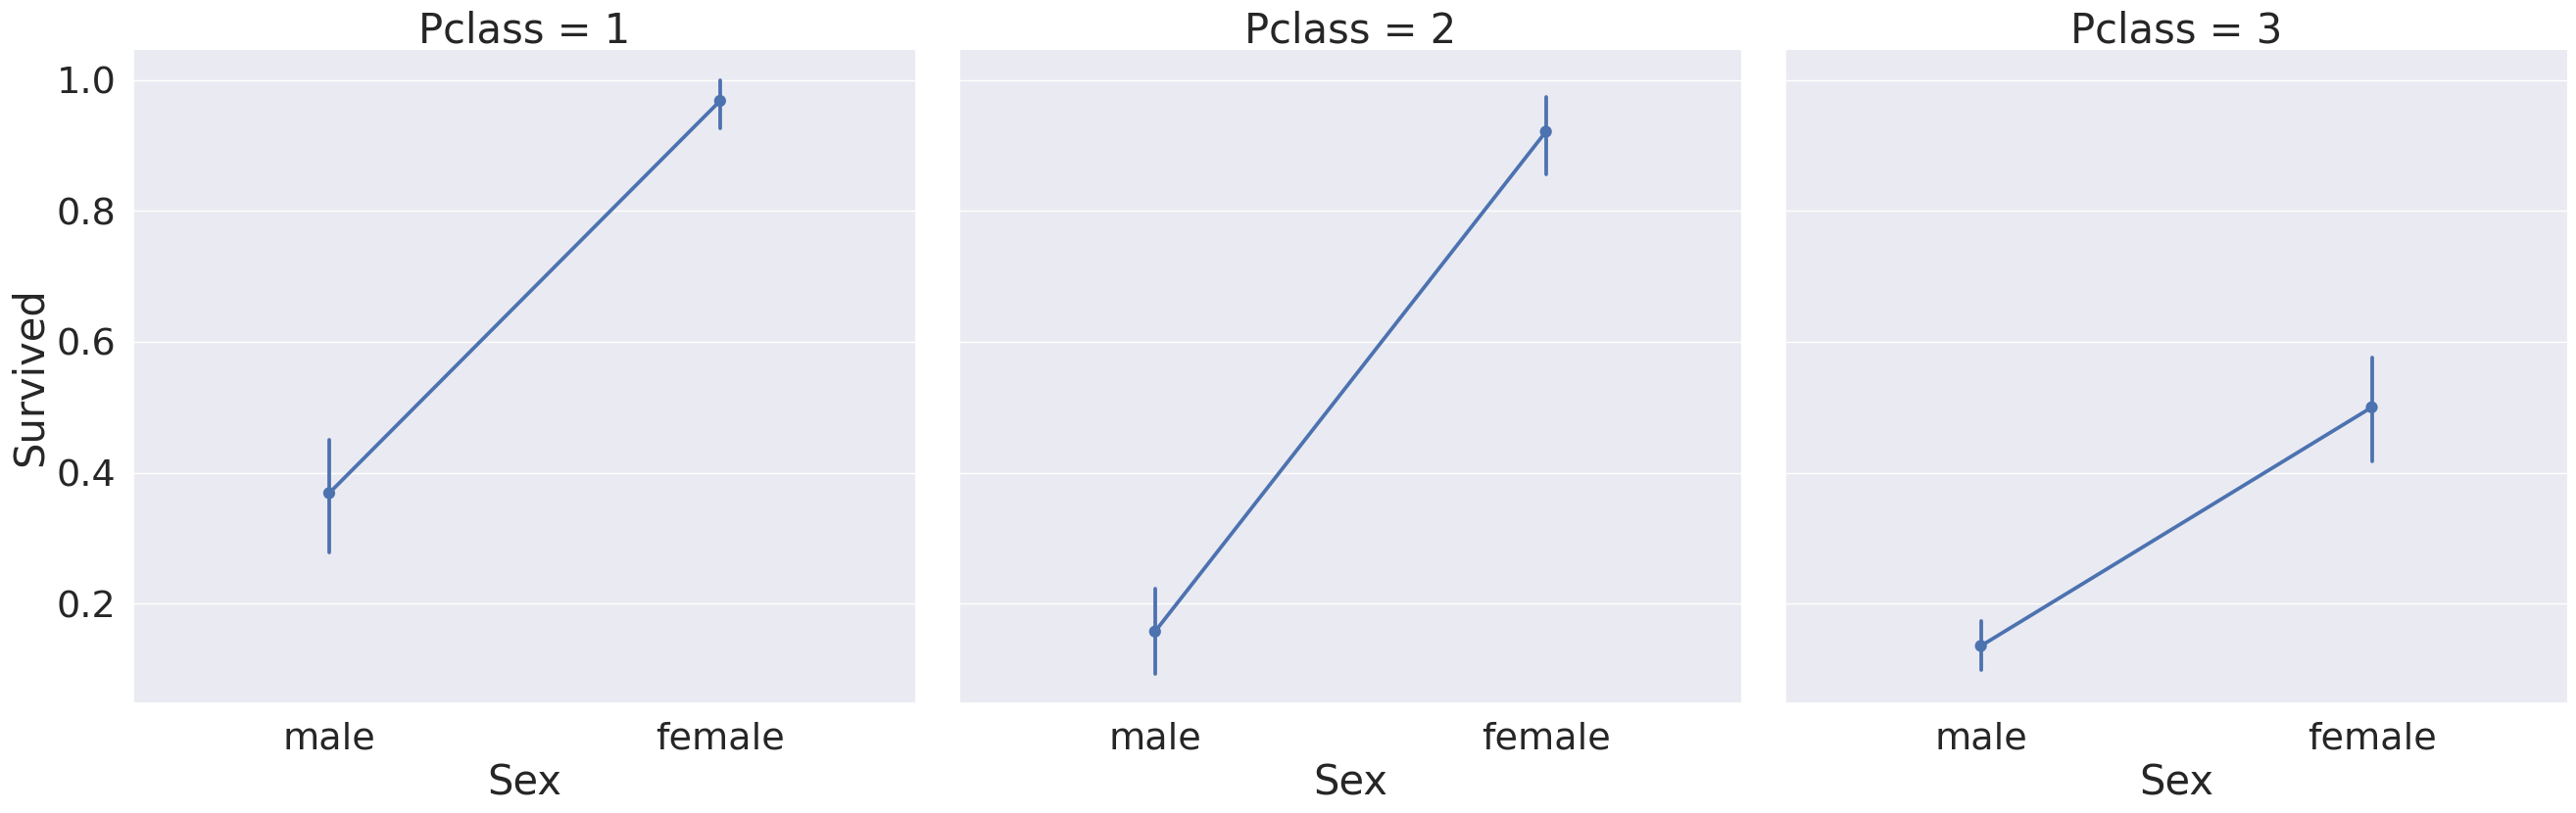

In [21]:
sns.catplot(x='Sex', y='Survived', col='Pclass', data=df_train, kind='point',height=9, aspect=1)
# factorplot -> catplot / x,y, kind='point' / satureation= 채도인데 없어짐

# 2.4 Age

In [22]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 나이 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 나이 어린 탑승객 : 0.4 Years
탑승객 평균나이 : 29.7 Years


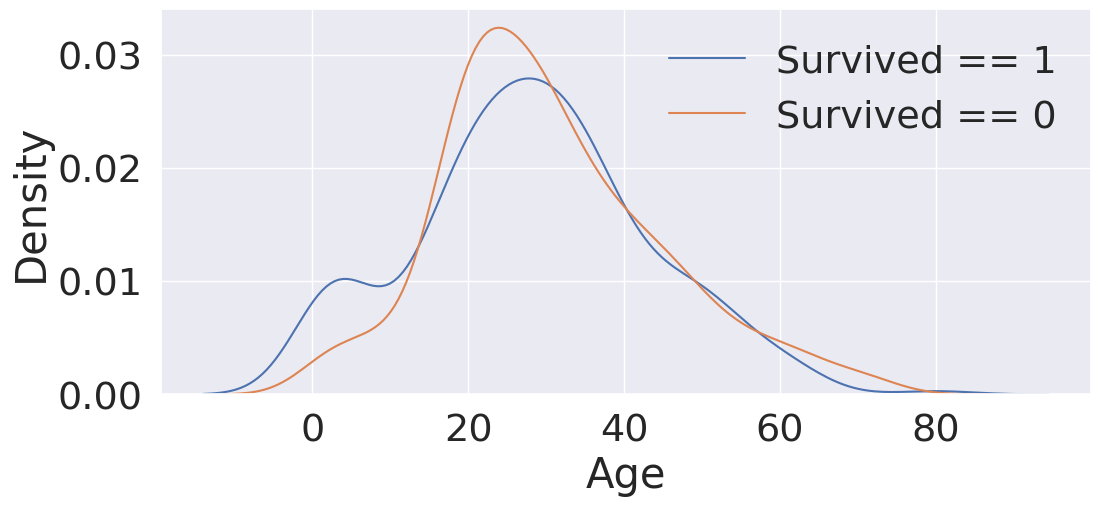

In [23]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
#df_train[bool] / kde : kenel density estimate
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
# legend : 병합  / 'Survived==1', 'Survived == 0' 는 우측 상단 표시 즉 안 쓰면 표시없이 병
plt.show()

<Axes: >

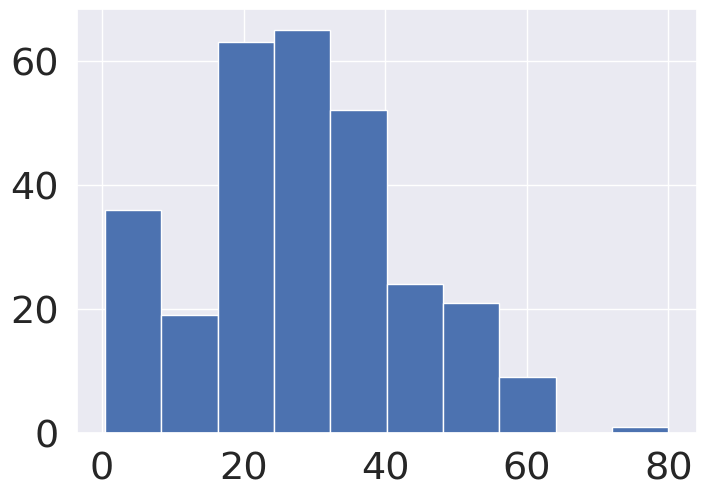

In [24]:
df_train[df_train['Survived']==1]['Age'].hist()
# hist : 히스토그램

In [25]:
df_train.iloc[0, :]
# iloc : integer location 데이터 프레임의 행이나 칼럼의 순서를 나타내는 정수
# df.iloc[행 인덱스: 열 인덱]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [26]:
df_train.loc[0, :]
# iloc : 서순 / loc : name
# iloc[:3] : 0~2 행  / loc[:3] : 0~ 행이름이 '3' 인 행까지
# iloc[:3, :3] = loc[:2, :'Pclass']

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [27]:
df_train.iloc[:3, :3]

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3


In [28]:
df_train.loc[:2, :'Pclass']

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

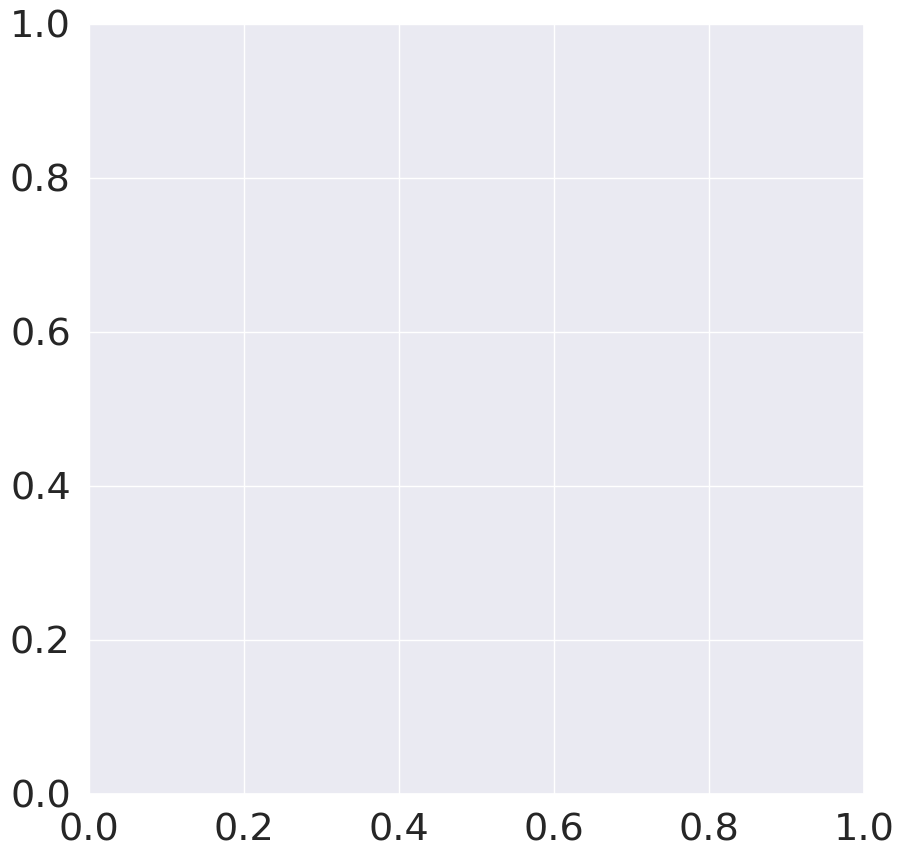

<Figure size 1000x1000 with 0 Axes>

In [29]:
f = plt.figure(figsize=(10,10))
# 도화지를 놓는데 axis를 가지지 않은 상태
f, ax = plt.subplots(1, 1, figsize=(10,10))
# 축 반환
plt.figure(figsize=(10, 10))
# 셋 다 동일, 도화지를 준비하는 세가지 방법

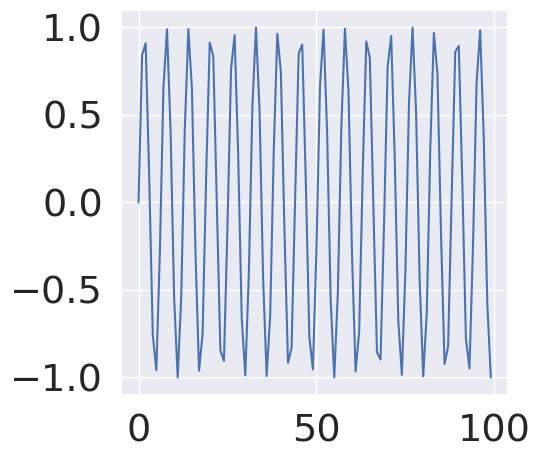

In [30]:
f, ax= plt.subplots(1, 1, figsize=(5,5))
a = np.arange(100)
b = np.sin(a)
ax.plot(b)
# plt.plot(b)

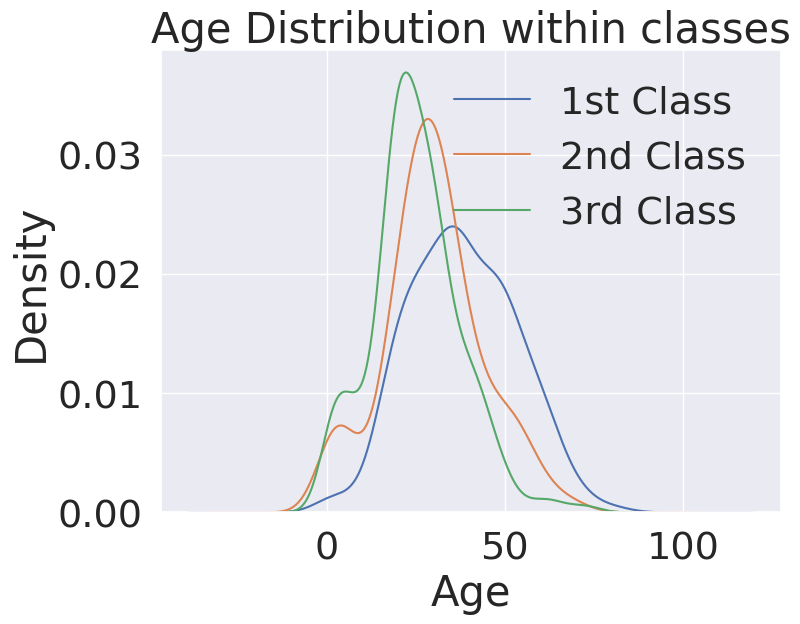

In [31]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
# 'kde'로 할 시 연속적, 'hist'로 하면 구분적이어서 하눈에 보기 힘듦
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
#df_train['Age'][df_train['Pclass']==3].plot(kind='kde')
# sns.kdeplot과 동일, 편한대로 사용
sns.kdeplot(df_train['Age'][df_train['Pclass']==3])
plt.xlabel('Age')
# ax로 할 경우, ax.set_xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

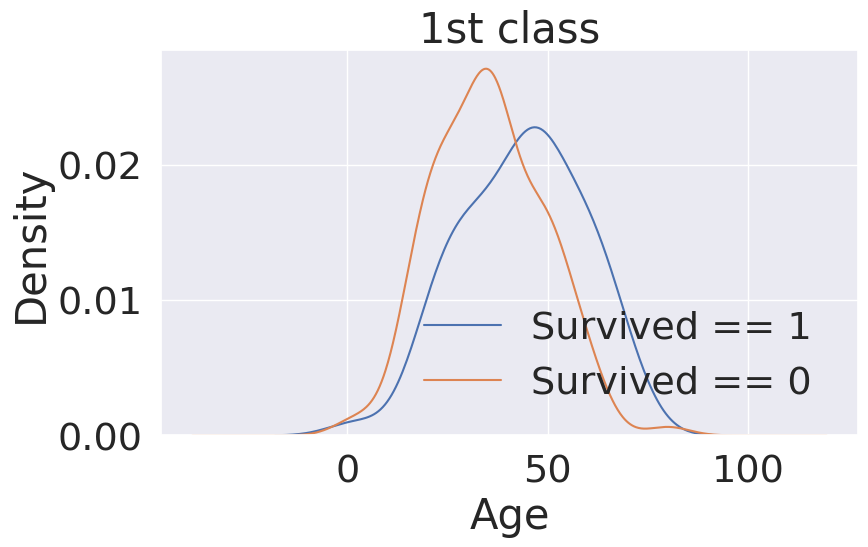

In [32]:
fig, ax = plt.subplots(1, 1, figsize = (9,5))
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass'] ==1)]['Age'], ax=ax) #ax 안써도 되긴함
#sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass'] ==1)]['Age'], ax=ax)
df_train[(df_train['Survived']==1)&(df_train['Pclass']==1)]['Age'].plot(kind='kde')
plt.legend(['Survived == 1', 'Survived == 0 '])
plt.title('1st class')
plt.show()

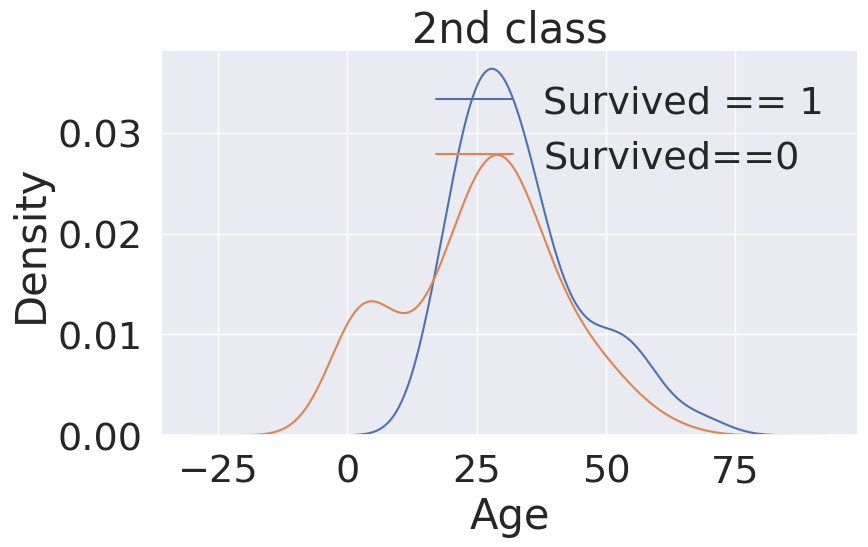

In [33]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==2)]['Age'], ax=ax)
df_train[(df_train['Survived']==1) & (df_train['Pclass']==2)]['Age'].plot(kind='kde', ax=ax)
#sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==2)]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived==0'])
plt.title('2nd class')
plt.show()

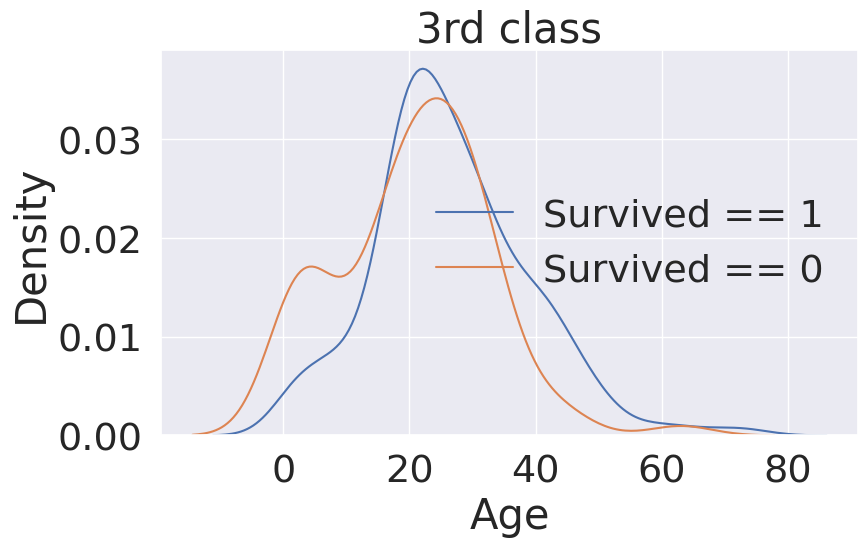

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==0) & (df_train['Pclass']==3)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==1) & (df_train['Pclass']==3)]['Age'], ax=ax)
# df_train[(df_train['Survived']==1) & (df_train['Pclass']==3)]['Age'].plot(kind='kde')
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('3rd class')
plt.show()


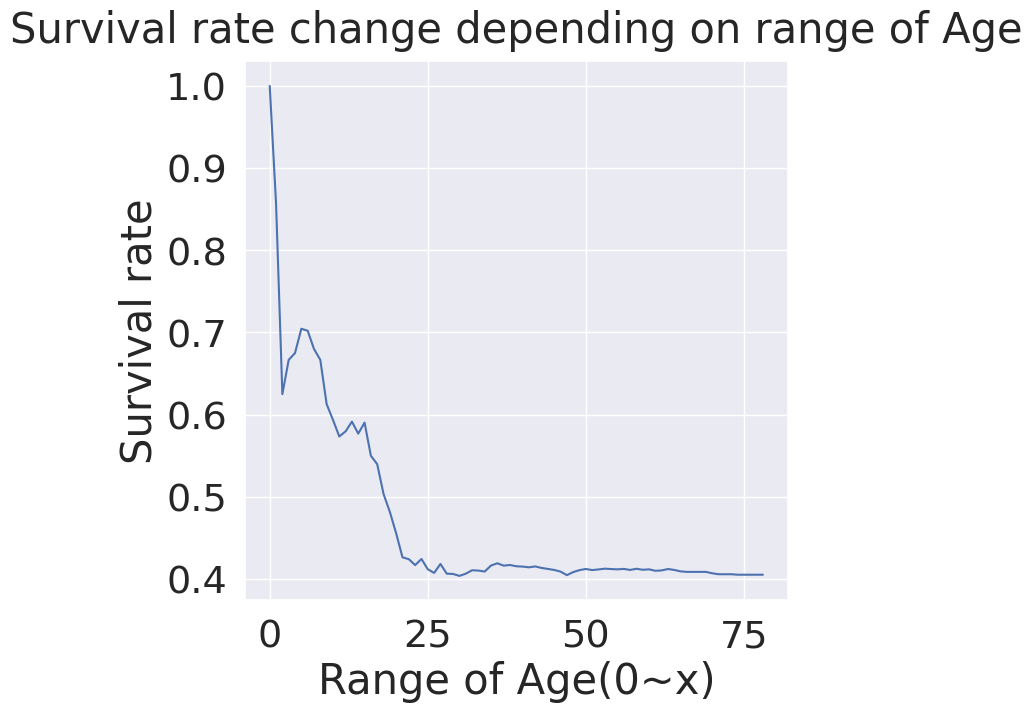

In [35]:
change_age_range_survival_ratio=[]

for i in range(1,80):
    change_age_range_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum()/ len(df_train[df_train['Age']< i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

In [36]:
i = 10
df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age']<i]['Survived'])

0.6129032258064516

In [37]:
df_train[df_train['Age'] < i]['Survived'].sum()

38

In [38]:
len(df_train[df_train['Age']<i]['Survived'])

62

# 2.5 Pclass, Sex, Age
* 지금가지 본 Sex, Age, Survived 모두에 대해서 보고 싶습니다. 이를 쉽게 그려주는 것이 seaborn의 violinplot입니다.
* x축은 우리가 나눠서 보고싶어하는 case(여기선 Pclass, Sex)를 나타내고, y축은 보고 싶어하는 distribution(Age)입니다.

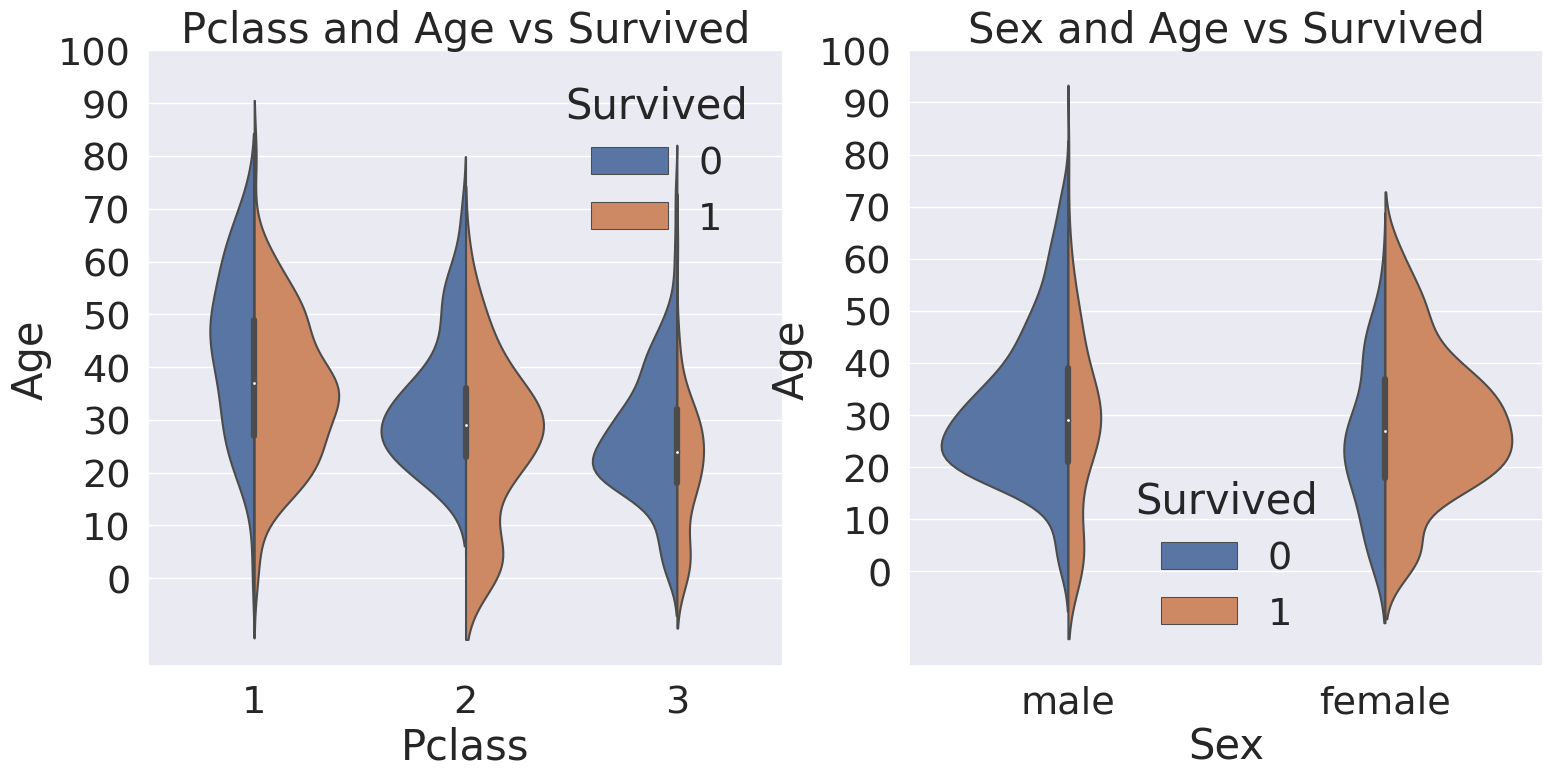

In [39]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df_train, scale= 'count', split=True, ax=ax[0])
# 바이올린 모양이어서 violinplot / split=False : 두개 나눠짐 / scale = 'count' 츨정된 넓이만큼, 'area' 모든 넓이 동일
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, scale= 'count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

# 2.6 Embarked
* Embarked는 탑승한 항구를 나타낸다

<Axes: xlabel='Embarked'>

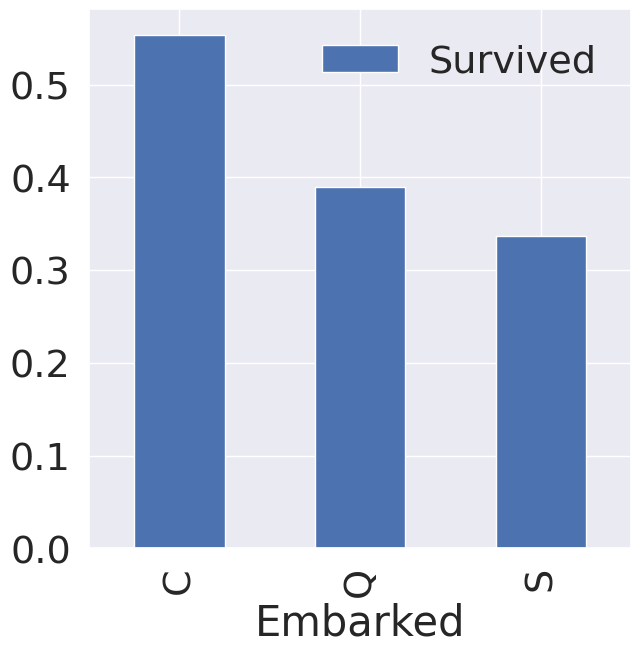

In [40]:
f, ax = plt.subplots(1,1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)
# sort_values('a', ascending=False): a값 기준으로 내림차순 정렬

In [41]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_index()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


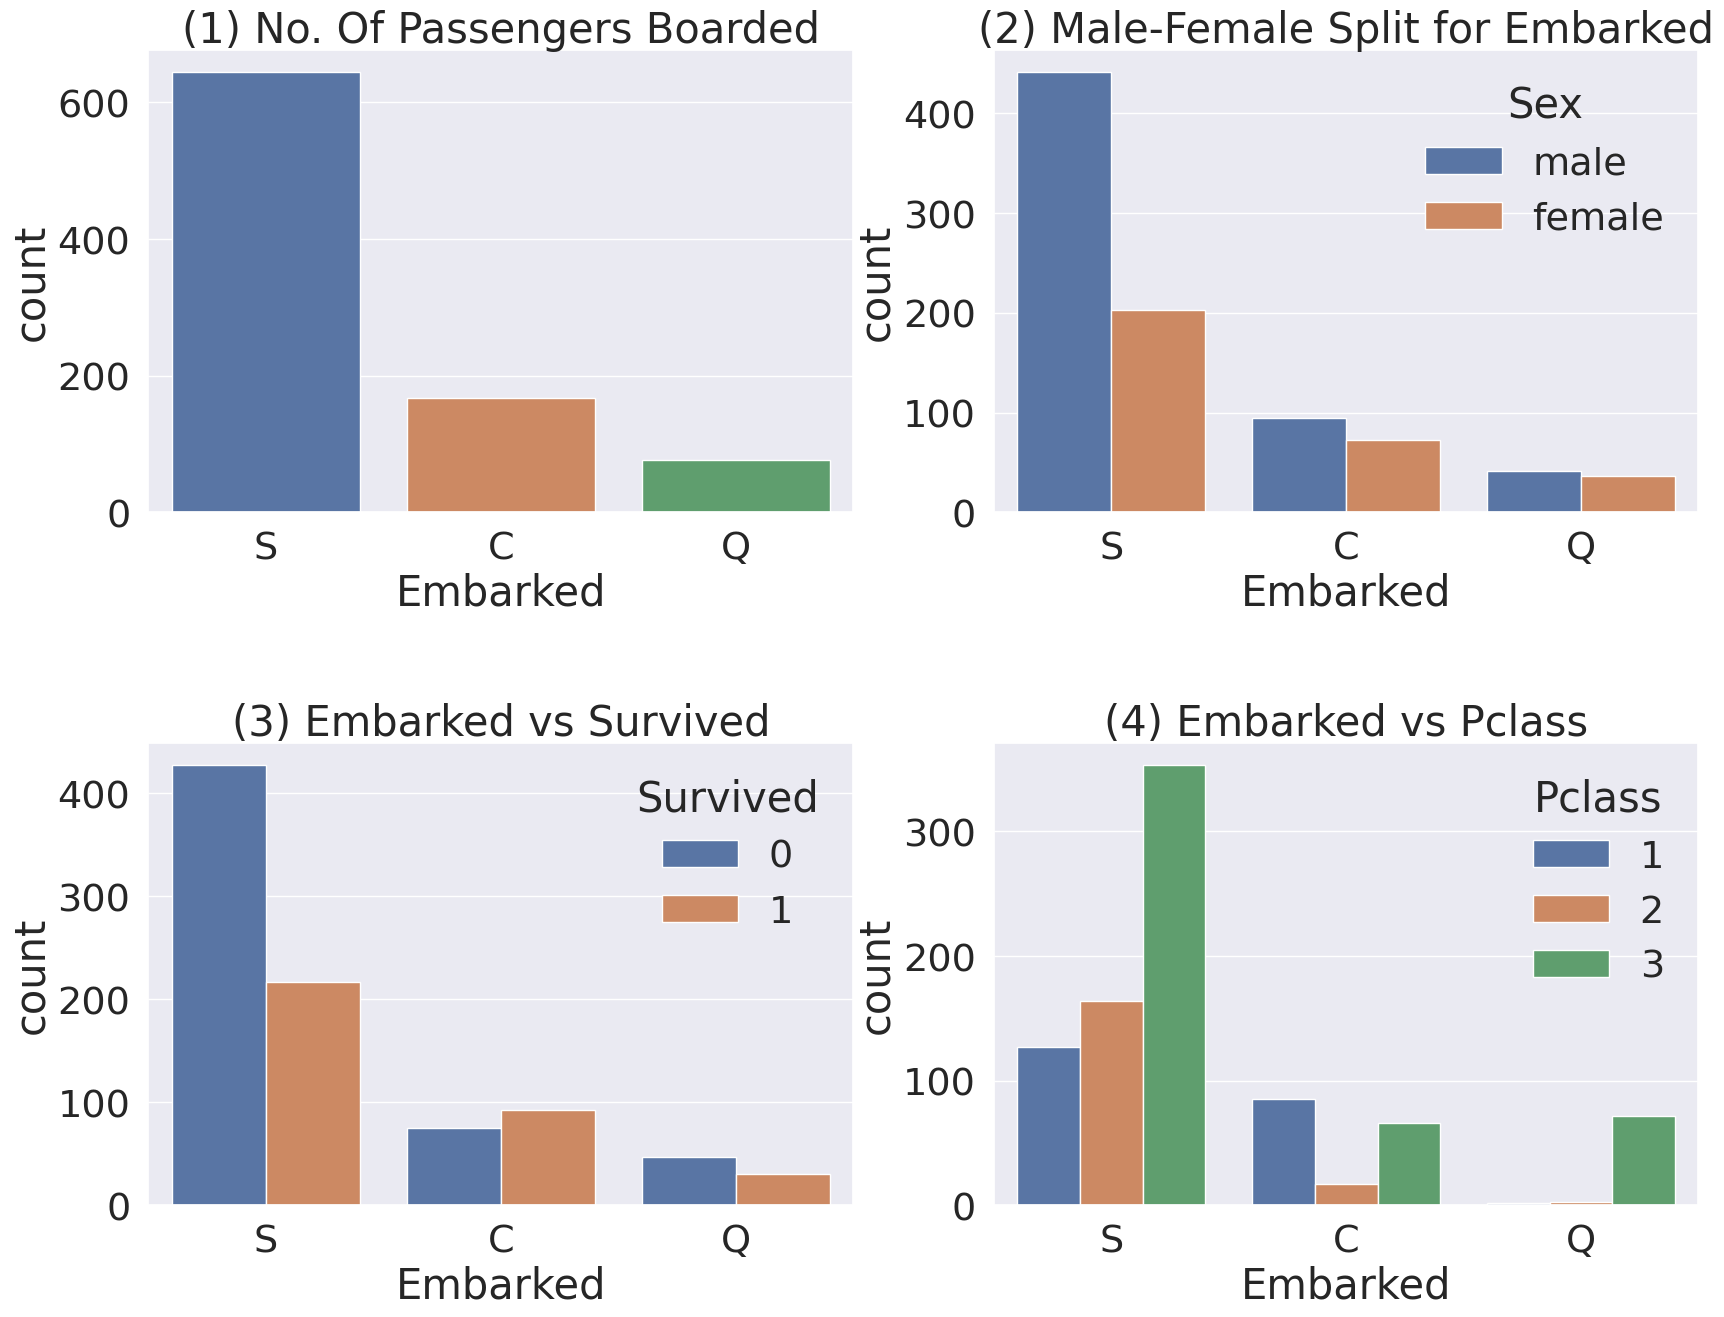

In [42]:
f,ax = plt.subplots(2,2, figsize=(20,15))
sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot(x='Embarked', hue= 'Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# 2.7 Family - Sibsp(형제자매) + Parch(부모, 자녀)

In [43]:
df_train['FamilySize'] = df_train['SibSp'] +df_train['Parch'] +1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
# 자신을 포함해야하므로 +1

In [44]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


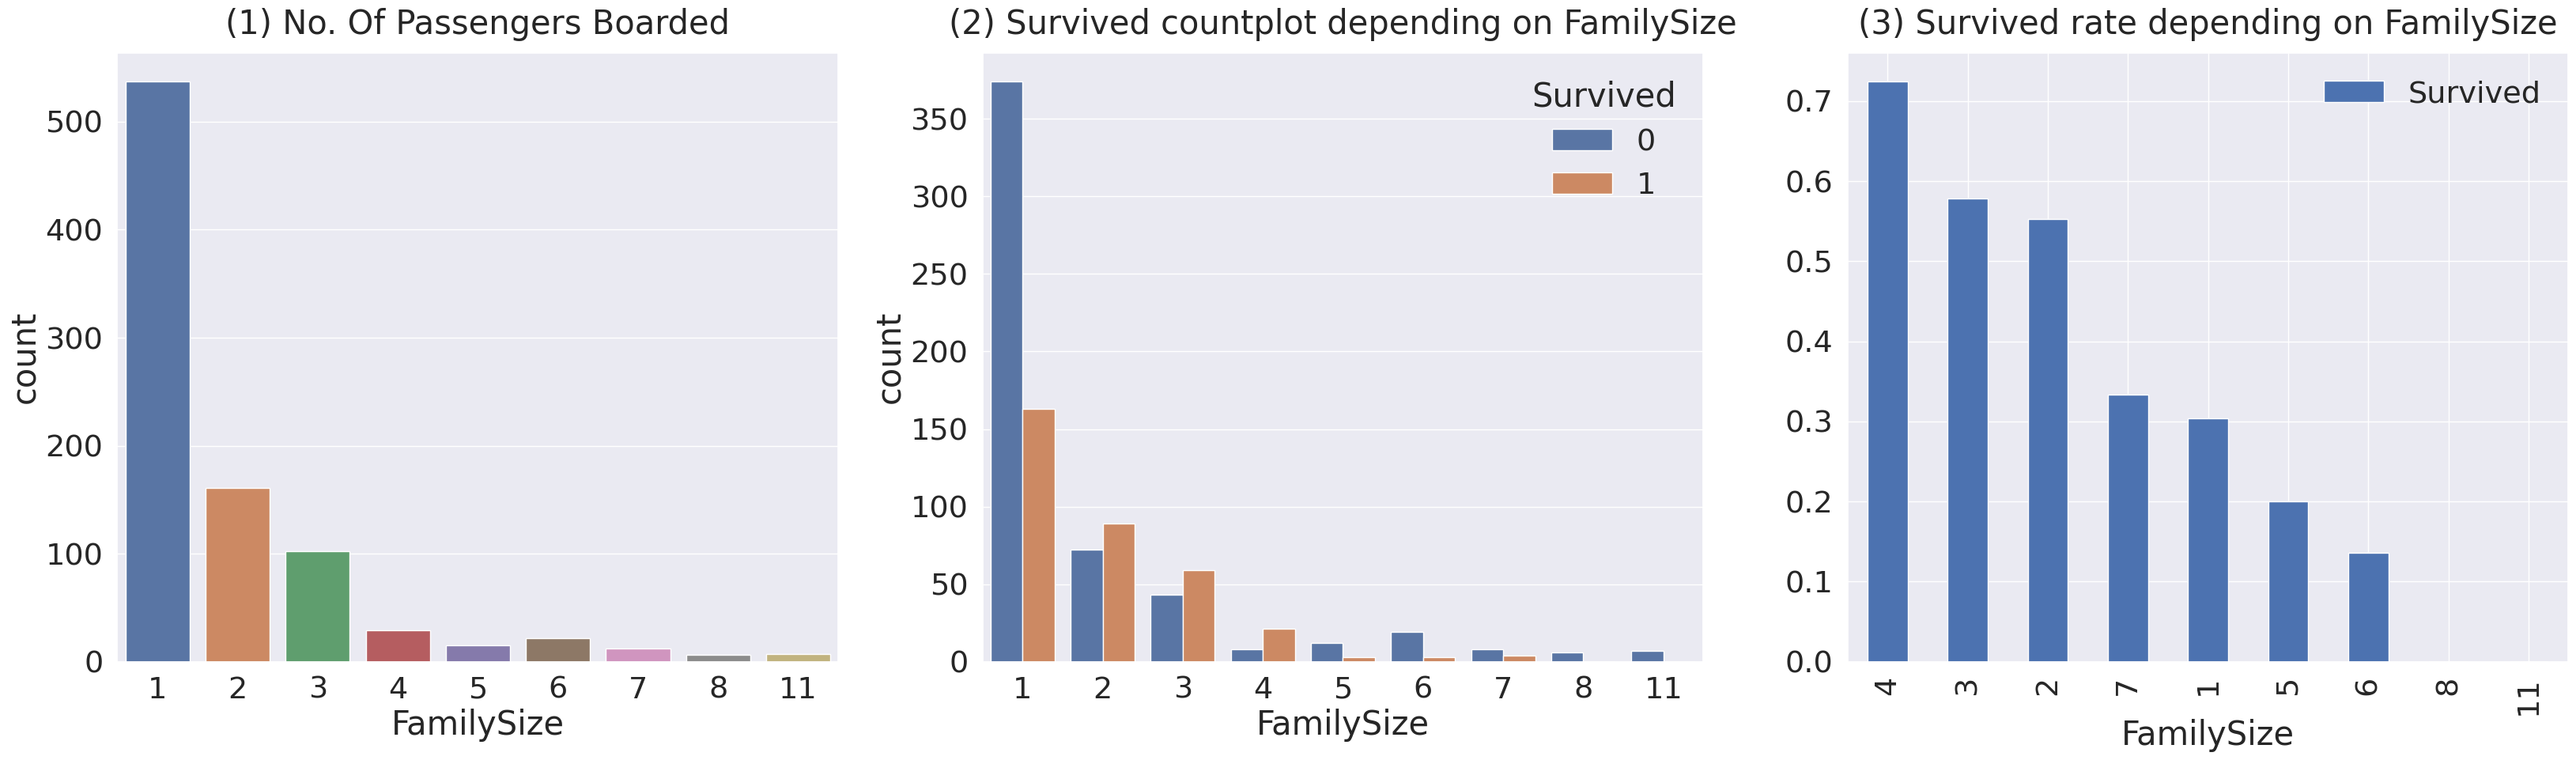

In [45]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot(x='FamilySize', data= df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

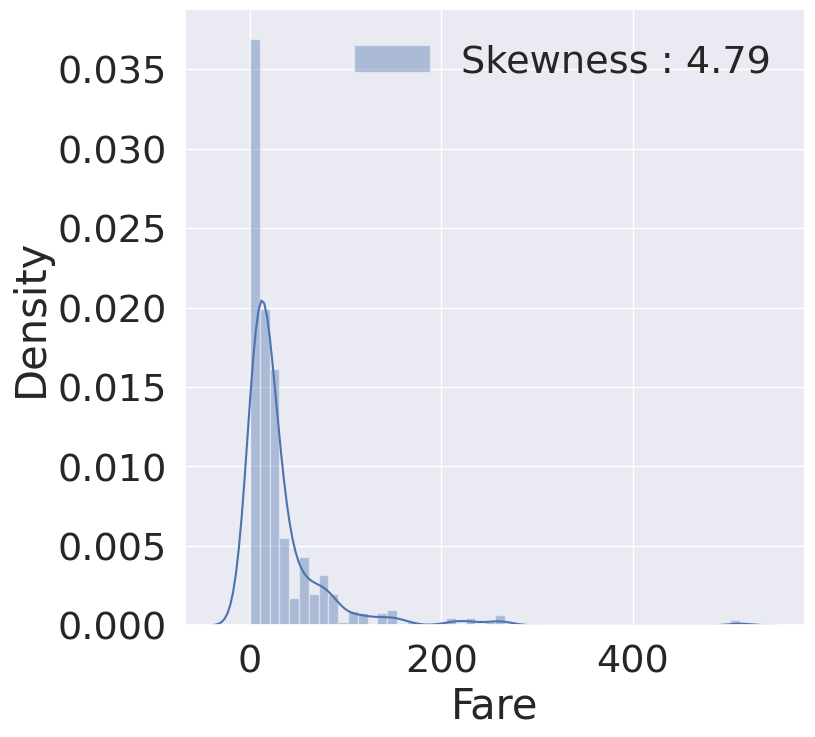

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
# skewness: 왜곡/ a=0: 정상/ a>0 왼쪽으로, a<0 우측으로
g = g.legend(loc='best')
# loc = 'best' 최상의 위치로 조정 /  distplot: seaborn 중 distribution을 표현

* 그래프를 보면 distribution이 매우 비대칭인것을 알 수 있다. 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있다. 몇개 없는 outlier에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있다.
* outlier의 영향을 줄이기 위해 Fare에 log를 취하자
* 여기서 우리는 pandas의 유용한 기능을 사용할 것이다. dataFrame의 특정 columns에 공통된 작업(함수)를 적용하고 싶으면 아래의 map, 또는 apply를 사용하면 매우 손쉽게 적용할 수 있다.
* 우리가 지금 원하는 것은 Fare columns의 데이터 모두를 log 값 취하는 것인데, 파이썬의 간단한 lambda 함수를 이용해 간단한 로그를 적용하는 함수를 map에 인수로 넣어주면, Fare columns 데이터에 그대로 적용이 된다. 매우 유용한 기능이다.

In [47]:
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i>0 else 0)

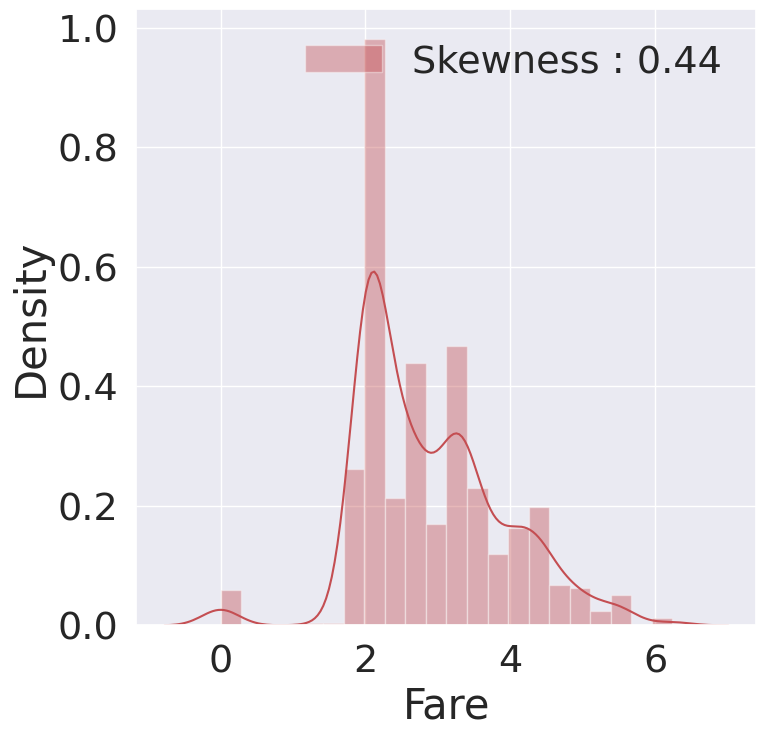

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='r', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g=g.legend(loc='best')

# 2.9 Cabin
* 이 feature는 NaN이 대략 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않다.
* 그러므로 우리가 세우려는 모델에 포함시키지 않도록 하

In [49]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,2.564949,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.401197,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,3.154870,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,3.401197,C148,C,1


2.10 Ticket
* 이 feature는 NaN이 없다. 일단 string data이므로 우리가 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요하다.

In [50]:
df_train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

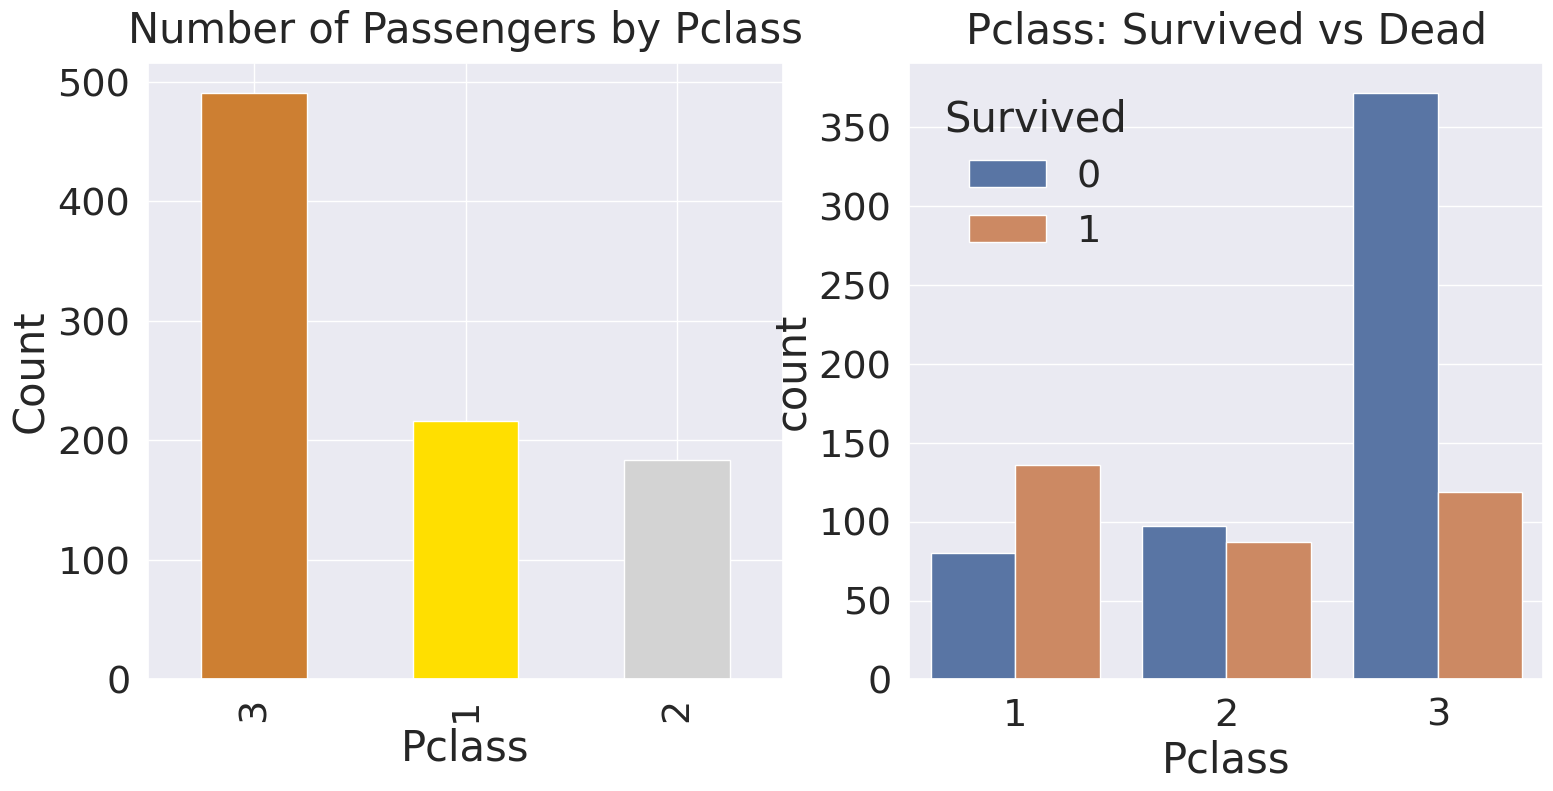

In [51]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))
# f, ax : 아래 그래프의 행, 열
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', data=df_train , ax=ax[1], hue= 'Survived')
# sns : imort seaborn as sns / hue: 하나의 구분 색을 나눠서 보여줌 / x,data, ax, hue 서순 필요없음
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

# 3. Feature engineering
* 본격적인 feature engineering을 시작해보자
* 가장 먼저, dataset에 존재하는 null data를 채우자
* 아무 숫자로 채울 순 없고, null data를 포함하는 feature의 statistics를 참고하거나, 다른 아이디어를 짜내어 채워야 한다.
* null data를 어떻게 채우느냐에 따라 모델의 성능이 좌지우지 되므로, 신경써야 한다.
* Feature engineering은 실제 모델의 학습에 쓰려고 하는 것이므로, train 뿐만 아니라 test도 또같이 적용해줘야 한다.
# 3.1 Fill Null
# 3.1.1 Fill Null in Age using title
* Age에는 null data가 177개가 있다. 이를 채울 수 있는 여러 아이디어가 있을것인데, 여기서 우리는 title + statistics를 사용해 보자
* 영어에서는 Miss, Mrr, Mrs 같은 title이 존재한다. 각 탑승객의 이름에는 꼭 이런 title이 들어가게 되는데 이를 사용하자
* pandas series에는 string으로 바꿔주는 str method, 거기에 정규표현식을 적용하게 해주는 extract method가 있다. 이를 사용하여 title을 쉽게 추출하자. title -> initial column

In [52]:
df_train['Age'].isnull().sum()

177

In [53]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
# 하나의 캐릭터 한개이상이며, (\.)이 점이 붙은거
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [54]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr


In [55]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [56]:
df_train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt','Sir', 'Don', 'Dona'],['Miss', 'Miss', 'Miss', 'Mr', 'Mr','Mrs','Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)
# inplace로 바로 적용
df_test['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt','Sir', 'Don', 'Dona'],['Miss', 'Miss', 'Miss', 'Mr', 'Mr','Mrs','Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)

In [57]:
df_train.groupby('Initial').mean(numeric_only =True)
# numeric_only=True : numeric 데이터만 사용하

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<Axes: xlabel='Initial'>

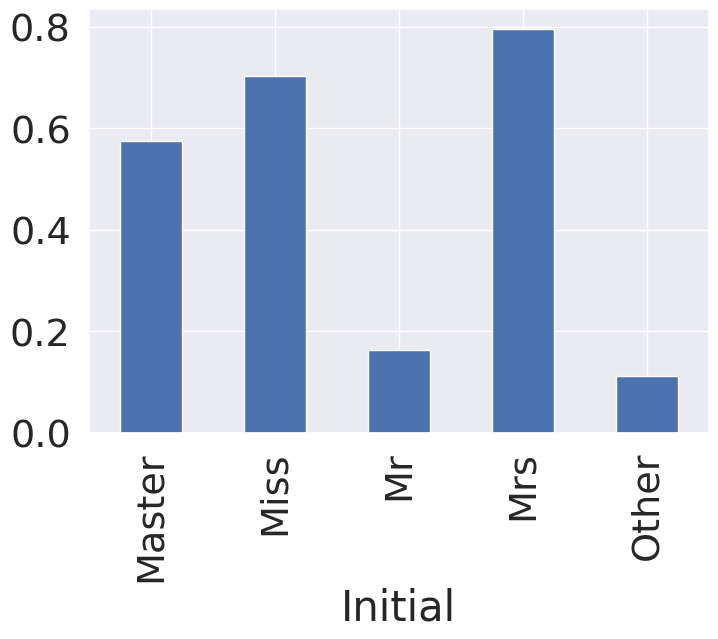

In [58]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

# Initial
* 이제 본격적으로 NUll을 채울 것이다. null data를 채우는 방법은 정말 많이 존재한다. statistics를 활용하는 방법도 있고, null data가 없는 데이터를 기반으로 새로운 머신러닝 알고리즘을 만들어 예측해서 채워넣는 방식도 있다. 여기서는 statistics를 활용하는 방법을 사용하자.
* 여기서 statistics는 train data의 것을 의미한다. 우리는 언제나 test를 unseen으로 둔 상태로 놔둬야 하며, train에서 얻은 statistics를 기반으로 test의 null data를 채워야 한다.

In [59]:
#df_train.groupby('Initial').mean()
# mean()하면 오류 / mean(numeric=True)

* Age의 평균을 이용해 null value를 채우도록 하자
* pandas dataframe을 다룰때에는 boolean array를 이용해 indexing 하는 방법이 편리하다
* 아래 코드 첫줄을 해석하면, isnull()이면서 Initial이 Mr인 조건을 만족하는 row(탑승객)의 'Age'의 값을 33으로 치환한다. 
* loc + boolean + column을 사용해 값을 치환하는 방법은 자주 쓰이므로 꼭 익숙해지자

In [60]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Master'), 'Age'] = 35
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Other'), 'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Mr'), 'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Mrs'), 'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Master'), 'Age'] = 35
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Miss'), 'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Other'), 'Age'] = 46

In [61]:
df_train['Age'].isnull().sum()

0

# 3.1.2 Fill Null in Embarked
* Embarked는 Null value가 2개이고, S에서 가장 많은 탑승객이 있었으므로, 간단하게 Null을 S로 채운다
* data의 fillna method를 이용하면 쉽게 채울 수 있다. 여기서 inplace= True로 하면 df_train에 fillna를 실제로 적용하게 된다.

In [62]:
df_train['Embarked'].isnull().sum()

2

In [63]:
df_train.loc[(df_train.Embarked.isnull()), 'Embarked'] = 'S'
# df_train['Embarked'].fillna('S', inplace=True)

In [64]:
df_train['Embarked'].isnull().sum()

0

# 3.2 Change Age(continuous to categorical)
* Age는 현재 continuous feature 입니다. 이대로 써도 모델을 세울 수 있지만, Age를 몇개의 group으로 나누어 category화 시켜줄 수도 있다. continuous를 categorical롤 바꾸면 자칫 information loss가 생길 수도 있다만, 본 듀토리얼에서는 다양한 방법을 소개하는 것이 목적이므로 진행하도록 하자
* 방법은 여러가지가 있다. dataframe의 indexing 방법인 loc를 사용하면 직접해줄 수 있고, 아니면 apply를 사용해 함수를 넣어 줄 수 있다.
* 첫번재로 loc를 사용한 방법이다. loc는 자주쓰게 되므로 그 사용법을 수직해야 한다.
* 나이는 10살 간격

In [65]:
df_train['Age_cat']=0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[(70 <= df_train['Age']), 'Age_cat'] =7

df_test.loc[df_test['Age'] <0, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[(70 <= df_test['Age']), 'Age_cat'] =7

In [66]:
def category_age(x):
    if x < 10:
        return 0
    elif x< 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [67]:
(df_train['Age_cat'] == df_train['Age_cat_2']).all()
# all을 모두 True일 시 True, 하나라도 False일시 False / amy는 하나라도 True일 시 True, True가 하나도 없으면 False

True

In [68]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
# column 제거는 drop, 'Age', 'Age_cat_2'제거, axis=1: 축으로 열 제거
df_test.drop(['Age'], axis=1, inplace = True)

In [69]:
df_train.iloc[:]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,S,1,Mr,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,2.564949,NaN,S,1,Other,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,3.401197,B42,S,1,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,3.154870,NaN,S,4,Miss,2
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,3.401197,C148,C,1,Mr,2


# 3.3 Change Initial, Embarked and Sex (string to numerical)
* 현재 Initial은 Mr, Mrs, Miss, Maser, Other 총 5개로 이루어져 있다. 이런 카테고리로 푷현되어져 있는 데이터를 모델에 input으로 넣어줄 때 우리가 해야할 것은 먼저 컴퓨터가 인식할 수 있도록 수치화 시켜야 한다.
* map method를 가지고 간단히 할 수 있다.
* 사전 순서대로 정리하여 mapping 하겠다.

In [70]:
df_train.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [71]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss':1, 'Mr': 2, 'Mrs':3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss':1, 'Mr': 2, 'Mrs':3, 'Other': 4})
#컴퓨터가 인식하기 편하게 mapping으로 변환

In [72]:
df_train.Embarked.unique()
#numpy
# df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [73]:
df_train.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [74]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [75]:
df_train['Embarked'].isnull().any()

False

In [76]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [77]:
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})

* 이제 각 feature 간의 상관관계를 한번 보려고 한다. 두 변수간의 Pearson correlation을 구하면(-1, 1)사이의 값을 얻을 수 있다. -1로 갈수록 음의 상관관계, 1로 갈수록 양의 상관관계를 의미하며, 0은 상관관계가 없다는 것을 의미한다. 구하는 수식은 다음과 같다
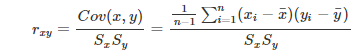
* 우리는 여러 feature을 가지고 있으니 이를 하나의 matrix 형태로 보면 편할텐데, 이를 heatmap plot이라 하며, dataframe의 corr() 메소드와 seaborn을 가지고 편하게 그릴 수 있다.

<Axes: title={'center': 'Pearson Correlation of Features'}>

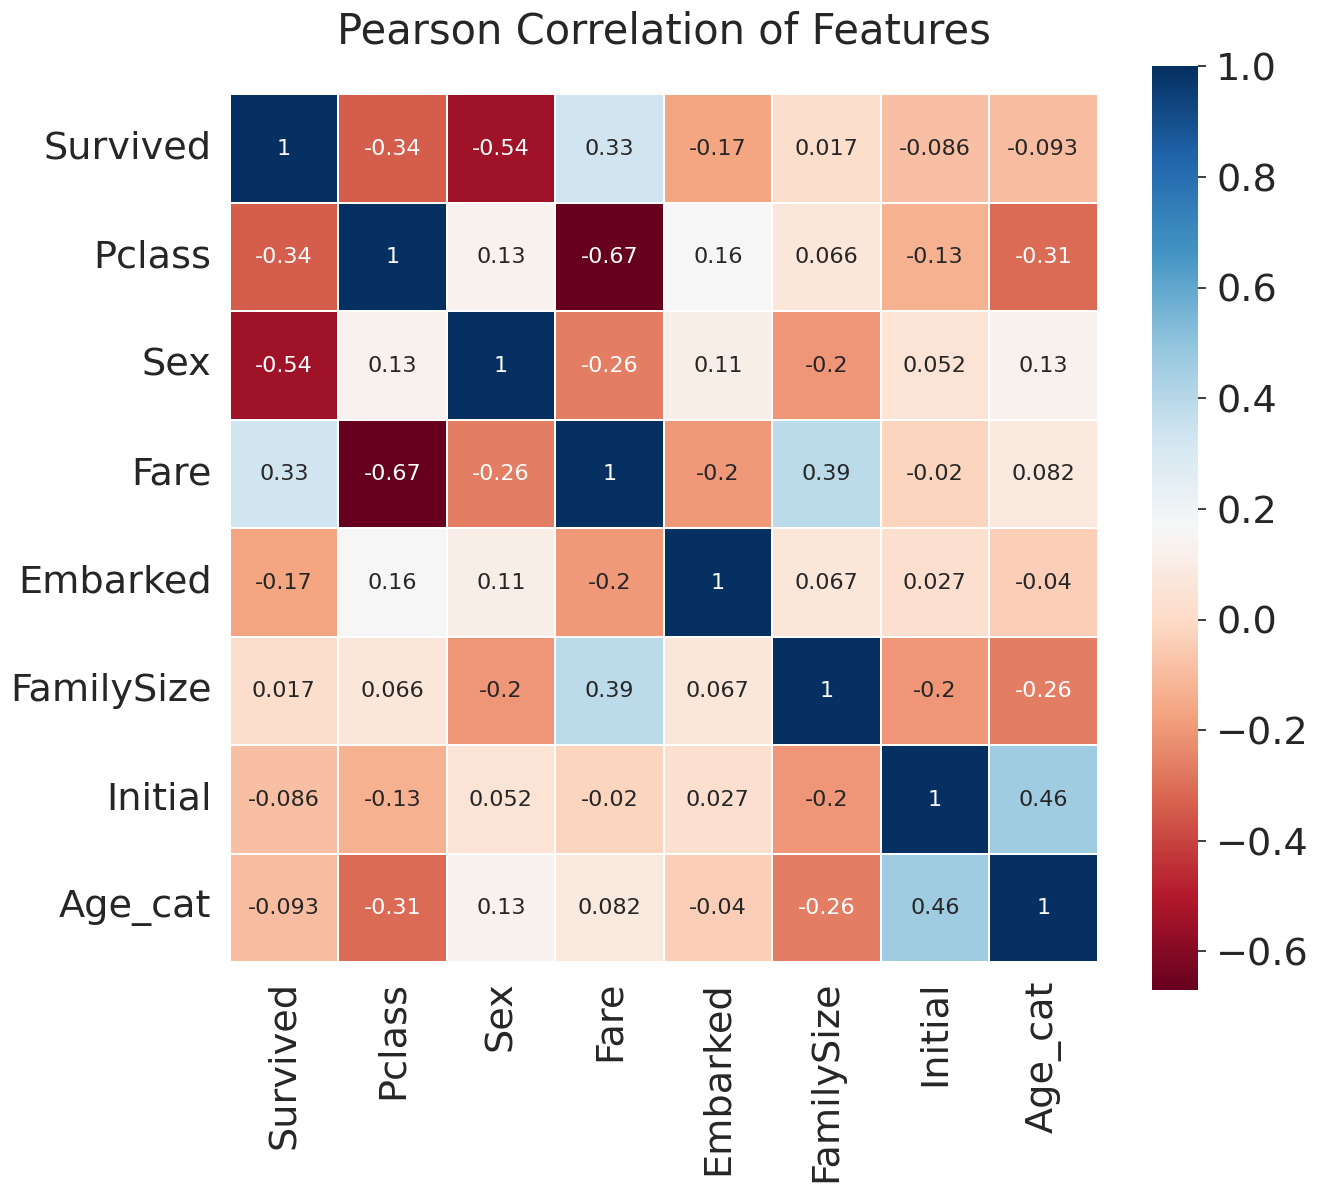

In [78]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=30)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, 
           square = True, cmap=colormap, linecolor = 'white', annot=True, annot_kws={'size':16})
# astype(float) 모든 변수 실수로, corr() : 모든 관계 다 실행 / vmax = 최댓값, annot=True: 각 cell의 값 표기 유무

* 우리가 EDA에서 살펴봤듯이, Sex와 Pclass가 Survived에 상관관계가 어느 정도 있음을 볼 수 있다.
* 생각보다 fare와 Embaked도 상관관계가 있음을 볼 수 있다.
* 또한 우리가 여기서 얻을 수 있는 정보는 서로 강한 상관관계를 가지는 feature들이 없다는 것이다.
* 이것은 우리가 모델을 학습시킬때, 불필요한 (redundant, superfluous) feature가 없다는 것을 의미한다. 1또는 -1의 상관관계를 가진 feature A, B가 있다면, 우리가 얻을 수 있는 정보는 사실 하나일 것이다.
* 이제 실제로 모델을 학습시키기 앞서서 data preprocessing (전처리)을 진행해보자

# 3.4 One-hot encoding on Initial and Embarked
* 수치화시킨 카테고리 데이터를 그대로 넣어도 되지만, 모델의 성능을 높이기 위해 one-hot encoding을 해줄 수 있다.
* 수치화는 간단히 Master==0, Miss==1, Mr==2, Mrs==3, Other==4로 매핑을 의미
* ONe-hot encoding은 위 카테고리를 아래와 같이 (0,1)로 이루어진 5차원의 벡터로 나타내는 것을 말한다
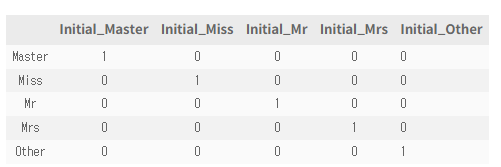
* 위와 같은 작업을 직접 코딩 할 수 있지만, pandas의 get_dummies를 사용하여 쉽게 해결 할 수 있다.
* 총 5개의 카테고리니, one-hot encoding을 하고 나면 새로운 5개의 column이 생겨난다.
* Initial을 prefix로 두어서 구분이 쉽게 만들어 준다.

In [79]:
df_train= pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [80]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,False,False,True,False,False


In [81]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns = ['Embarked'], prefix='Embarked')

In [82]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,False,False,True,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,False,False,False,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,False,True,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,False,False,False,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,False,False,True,False,False,False,False,True


* sklearn로 Labelencoder + OneHotencoder 이용해도 one-hot encoding이 가능하다.
* 가끔 category가 100개가 넘어가는 경우도 있다. 이때 one-hot encoding을 사용하면 column이 100개가 생겨, 학습시 매우 버거울 경우도 있다. 이런 경우는 다른 방법을 사용하기도 하다.
# 3.5 Drop columns
* 이제 필요없는 columns을 삭제하자

In [83]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [84]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,False,False,True,False,False,False,False,True
1,1,1,0,4.266662,2,3,False,False,False,True,False,True,False,False
2,1,3,0,2.070022,1,2,False,True,False,False,False,False,False,True
3,1,1,0,3.972177,2,3,False,False,False,True,False,False,False,True
4,0,3,1,2.085672,1,3,False,False,True,False,False,False,False,True


In [85]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,7.8292,1,3.0,False,False,True,False,False,False,True,False
1,3,0,7.0000,2,4.0,False,False,False,True,False,False,False,True
2,2,1,9.6875,1,6.0,False,False,True,False,False,False,True,False
3,3,1,8.6625,1,2.0,False,False,True,False,False,False,False,True
4,3,0,12.2875,3,2.0,False,False,False,True,False,False,False,True


# 4. Building machine learning model and prediction using the trained model
* 이제 준비가 다 끝났으니 sklearn을 사용해 본격적으로 머신러닝 모델을 만들어 보자

In [86]:
# importing all the required ML packages
from sklearn.ensemble import RandomForestClassifier #유명한 randomforestclassifier
from sklearn import metrics # for 모델의 평가
from sklearn.model_selection import train_test_split # training set 을 쉽게 나눠주는 함수

* sklearn은 머신러닝의 처음부터 끝가지가 다 있다. feature engineering, preprocessing, 지도 학습 알고리즘, 비지도 학습 알고리즘, 모델 평가, 파이프라인등 머신러닝에 관련된 모든 작업들이 손쉬운 인터페이스로 구현되어 있다. 데이터 분석 + 머신러닝을 하고 싶다면, 이 라이브러리는 반드시 숙지해야 한다.
* 지금 타이타닉 문제는 target class(survived)가 있으며, target class는 0,1로 이루어져 있으므로 (binary) classification 문제이다.
* 우리가 지금 가지고 있는 trainset의 survived을 제외한 input을 가지고 모델을 최적화시켜서 각 샘플(탑승객)의 생존유무를 판단하는 모델을 만들어야 한다.
* 그 후 모델이 학습하지 않았던 test set을 input으로 주어서 test set의 각 샘플(탑승객)의 생존 유무를 예측해 보자.

In [87]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
df_test.loc[df_test.Age_cat.isnull(), 'Age_cat'] = df_test['Age_cat'].mean()

# 4.1 Preparation - SPlit dataset into train, valid, test set
*  가장 먼저 학습에 쓰일 데이터와 target label(Survived)를 분리하자. drop을 사용해 간단히 할 수 있다.

In [88]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

* 보통 train, test만 업긎되지만, 실제 좋은 모델을 만들기 위해서 우리는 valid set을 따로 만드어 모델 평가를 한다.
* 마치 축구대표팀이 팀훈련(train)을 하고 바로 월드컵(test)로 나가는 것이 아니라, 팀훈련(train)을 한다음 평가전(valid)을 걸쳐 팀의 훈련정도(학습정도)를 확인하고 월드컵(test)에 나가는 것과 비슷하다.
* train_test_split을 사용하여 쉽게 train set을 분리하

In [89]:
df_train.shape

(891, 14)

In [90]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size = 0.3, random_state=2018)
# 891의 30%를 valid, 나머지는 train

* sklearn에서는 여러 머신러닝 알고리즘을 지원해준다. http://scikit-learn.org/stable/supervised_learning.html#supervised-learning 여기에 다양한 알고리즘 수가 있다.
* 여기선 랜던포레스트 모델을 사용할 것이다.
* 랜덤포레스트는 결정트리기반 모델이며, 여러 결정 트리들을 앙상블한 모델이다. 더 구체적인 모델 설명은 여러 블로그들 참고하면 된다.
* 각 머신러닝 알고리즘에는 여러 파라미터들이 있다. 랜덤포레스트분류기도 n_estimators, max_features, max_depth, min_samples_split, min_sample_leaf등 여러 파라미터들이 존재한다. 이것들이 어떻게 세팅되냐에 다라 같은 데이터셋이라 하더라도 모델의 성능이 달라진다.
* 파라미터 튜닝은 시간, 경험, 알고리즘에 대한 이해 등이 필요하다. 결국 많이 써봐야 모델도 잘 세운다. 즉 캐글을 숙달하자.
* 먼저 모델 객체를 만들고, fit 메소드로 학습시킨다.
* 그런 후 valid set input을 넣어주어 예측값(X_vld sample(탑승객)의 생존여부)를 얻는다.

# 4.2 Model generation and prediction

In [91]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction= model.predict(X_vld)

In [92]:
prediction

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1])

In [93]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100*metrics.accuracy_score(prediction,y_vld)))

총 268명 중 81.72% 정확도로 생존을 맞춤


* parameter tuning을 하지도 않았는데 82%가 나왔다.

In [94]:
(prediction == y_vld).sum() / prediction.shape[0]

0.8171641791044776

# 4.3 Feature importance
* 학습된 모델은 feature importance를 가지게 되는데, 우리는 이것을 확인하여 지금 만든 모델이 어떤 feature에 영향을 많이 받았는지 확인할 수 있다.
* 쉽게 말해 10 = 4x1+2x2+x3을 생각하면 우리는 x1이 결과값(10)에 큰 영향을 준다고 생각할 수 있다. feature importance는 4,2,1을 이야기하며 x1이 가장 큰값(4)를 가지므로, 이 모델에 가장 큰 영향을 미친다 할 수 있다.
* 학습된 모델은 기본적으로 feature importances를 가지고 있어서 쉽게 그 수치를 얻을 수 있다.
* pandas series를 이용하면 쉽게 sorting을 하여 그래프를 그릴 수 있다.

In [95]:
model.feature_importances_

array([0.09864705, 0.11087258, 0.32071736, 0.09434435, 0.12255141,
       0.0147471 , 0.03378155, 0.1237439 , 0.03062519, 0.00549809,
       0.01384277, 0.01124865, 0.01938   ])

In [96]:
from pandas import Series
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

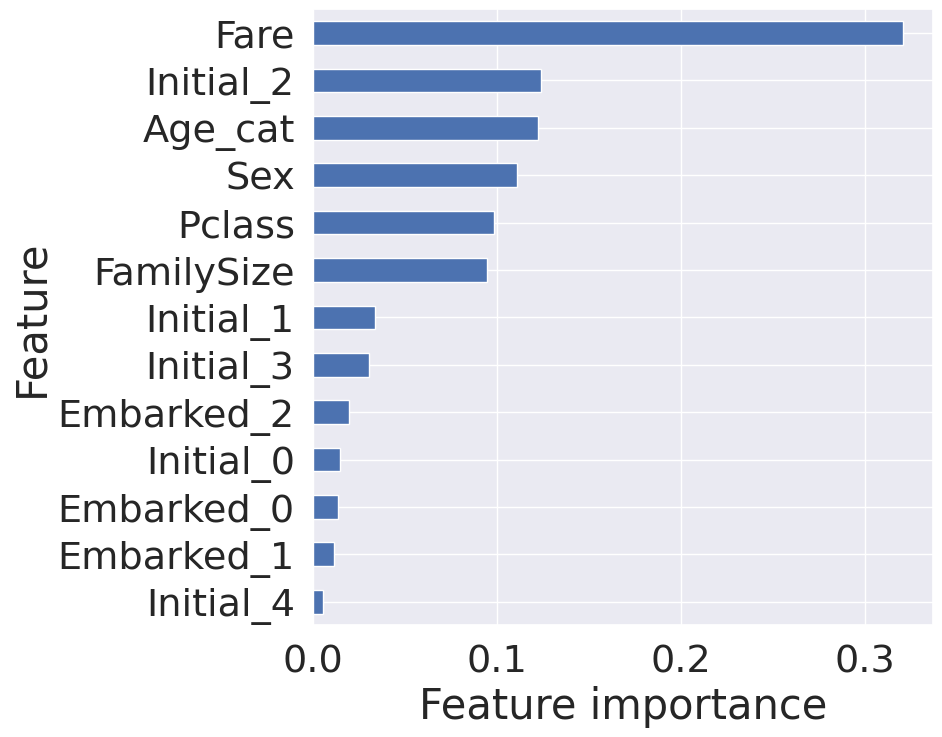

In [97]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

* 우리가 얻은 모델에서는 Fare가 가장 큰 영향력을 가지며, 그 뒤로 차례대로 중요도를 가진다.
* 사실 feature importance는 지금 모델에서의 importance를 나타낸다. 만약 다른 모델을 사용하게 된다면 feature importance가 다르게 나올 수 있다.
* 이 feature importance를 보고 실제로 Fare가 중요한 feature일 수 있다고 판단을 내릴 수는 있지만, 이것은 결국 모델에 귀속되는 하나의 결론이므로 통계적으로 좀더 살펴봐야 한다.
* feature importance를 가지고 좀 더 정확도가 높은 모델을 얻기 위해 feature selection을 할수도 잇고, 좀더 빠른 모델을 위해 feature 제거를 할 수도 있다.

# 4.4 Prediction on Test set
* 이제 모델이 학습하지 않았던 test_set을 모델에 주어서, 생존여부를 확인하자
* 이 결과는 실제로 submission이므로 결과는 leaderboard에서 확인하자


In [98]:
submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [99]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [100]:
df_test.loc[df_test.Fare.isnull(), 'Fare']

Series([], Name: Fare, dtype: float64)

In [101]:
df_test.isnull().sum()

Pclass        0
Sex           0
Fare          0
FamilySize    0
Age_cat       0
Initial_0     0
Initial_1     0
Initial_2     0
Initial_3     0
Initial_4     0
Embarked_0    0
Embarked_1    0
Embarked_2    0
dtype: int64

In [102]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [103]:
submission.to_csv('../my_second_submission.csv', index=False)